In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedKFold
from nyaggle.feature.category_encoder import TargetEncoder

from nyaggle.experiment import run_experiment

In [3]:
train = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/train.csv')
test = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/test.csv')
era = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/era.csv')
sample_submission = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/sample_submission.csv')

In [4]:
#categorical変数抽出
cat_cols = [c for c in test.columns if train[c].dtype == np.object]

# numerical変数抽出
num_cols = [c for c in test.columns if train[c].dtype != np.object]

#目的変数抽出
target_col = 'is_kokuhou'

print(cat_cols)
print(num_cols)
print(target_col)

['棟名', '種別2', '国', '時代', '都道府県 ※美工品は「所有者住所（所在都道府県）」', '所在地', '保管施設の名称', '所有者名', '管理団体又は責任者']
['緯度', '経度']
is_kokuhou


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [5]:
# target encoding

# kf = KFold(4)
# kf = KFold(4, groups=train.categorical)　#GroupKFold
kf = StratifiedKFold(5, shuffle=True, random_state=42531) #StratifiedKFold

# Target encoding with K-fold
# te = TargetEncoder(kf.split(train))
# te = TargetEncoder(kf.split(train)) #GroupKFold
te = TargetEncoder(kf.split(train, train[target_col])) #StratifiedKFold

# use fit/fit_transform to train data, then apply transform to test data
train.loc[:, cat_cols] = te.fit_transform(train[cat_cols], train[target_col])
test.loc[:, cat_cols] = te.transform(test[cat_cols])

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.26151
[2]	valid_0's binary_logloss: 0.258184
[3]	valid_0's binary_logloss: 0.254795
[4]	valid_0's binary_logloss: 0.252609
[5]	valid_0's binary_logloss: 0.250559
[6]	valid_0's binary_logloss: 0.24825
[7]	valid_0's binary_logloss: 0.246627
[8]	valid_0's binary_logloss: 0.245493
[9]	valid_0's binary_logloss: 0.244214
[10]	valid_0's binary_logloss: 0.243048
[11]	valid_0's binary_logloss: 0.24221
[12]	valid_0's binary_logloss: 0.241574
[13]	valid_0's binary_logloss: 0.240845
[14]	valid_0's binary_logloss: 0.240392
[15]	valid_0's binary_logloss: 0.239563
[16]	valid_0's binary_logloss: 0.238723
[17]	valid_0's binary_logloss: 0.23828
[18]	valid_0's binary_logloss: 0.237872
[19]	valid_0's binary_logloss: 0.237153
[20]	valid_0's binary_logloss: 0.236996
[21]	valid_0's binary_logloss: 0.23718
[22]	valid_0's binary_logloss: 0.237099
[23]	valid_0's binary_logloss: 0.237087
[24]	valid_0's binary_logloss: 0.23643
[25]	valid_0's binary_logloss: 0.236386
[26]	valid_0's 

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.261213
[2]	valid_0's binary_logloss: 0.257983
[3]	valid_0's binary_logloss: 0.255109
[4]	valid_0's binary_logloss: 0.252257
[5]	valid_0's binary_logloss: 0.250186
[6]	valid_0's binary_logloss: 0.248754
[7]	valid_0's binary_logloss: 0.24674
[8]	valid_0's binary_logloss: 0.245288
[9]	valid_0's binary_logloss: 0.244496
[10]	valid_0's binary_logloss: 0.243782
[11]	valid_0's binary_logloss: 0.242928
[12]	valid_0's binary_logloss: 0.24198
[13]	valid_0's binary_logloss: 0.24125
[14]	valid_0's binary_logloss: 0.240469
[15]	valid_0's binary_logloss: 0.239969
[16]	valid_0's binary_logloss: 0.239569
[17]	valid_0's binary_logloss: 0.239192
[18]	valid_0's binary_logloss: 0.238645
[19]	valid_0's binary_logloss: 0.238092
[20]	valid_0's binary_logloss: 0.238029
[21]	valid_0's binary_logloss: 0.237615
[22]	valid_0's binary_logloss: 0.237349
[23]	valid_0's binary_logloss: 0.236891
[24]	valid_0's binary_logloss: 0.23669
[25]	valid_0's binary_logloss: 0.23672
[26]	valid_0's

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.259362
[2]	valid_0's binary_logloss: 0.254626
[3]	valid_0's binary_logloss: 0.251046
[4]	valid_0's binary_logloss: 0.247878
[5]	valid_0's binary_logloss: 0.245151
[6]	valid_0's binary_logloss: 0.242905
[7]	valid_0's binary_logloss: 0.240733
[8]	valid_0's binary_logloss: 0.239337
[9]	valid_0's binary_logloss: 0.237941
[10]	valid_0's binary_logloss: 0.236569
[11]	valid_0's binary_logloss: 0.235257
[12]	valid_0's binary_logloss: 0.234276
[13]	valid_0's binary_logloss: 0.233576
[14]	valid_0's binary_logloss: 0.232925
[15]	valid_0's binary_logloss: 0.232329
[16]	valid_0's binary_logloss: 0.232066
[17]	valid_0's binary_logloss: 0.231686
[18]	valid_0's binary_logloss: 0.231219
[19]	valid_0's binary_logloss: 0.230811
[20]	valid_0's binary_logloss: 0.230721
[21]	valid_0's binary_logloss: 0.230834
[22]	valid_0's binary_logloss: 0.230959
[23]	valid_0's binary_logloss: 0.230709
[24]	valid_0's binary_logloss: 0.229825
[25]	valid_0's binary_logloss: 0.229214
[26]	vali

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.260868
[2]	valid_0's binary_logloss: 0.257397
[3]	valid_0's binary_logloss: 0.253365
[4]	valid_0's binary_logloss: 0.24984
[5]	valid_0's binary_logloss: 0.247211
[6]	valid_0's binary_logloss: 0.245489
[7]	valid_0's binary_logloss: 0.244421
[8]	valid_0's binary_logloss: 0.243325
[9]	valid_0's binary_logloss: 0.242763
[10]	valid_0's binary_logloss: 0.241889
[11]	valid_0's binary_logloss: 0.240191
[12]	valid_0's binary_logloss: 0.239037
[13]	valid_0's binary_logloss: 0.238138
[14]	valid_0's binary_logloss: 0.237337
[15]	valid_0's binary_logloss: 0.236329
[16]	valid_0's binary_logloss: 0.235645
[17]	valid_0's binary_logloss: 0.235279
[18]	valid_0's binary_logloss: 0.234717
[19]	valid_0's binary_logloss: 0.233957
[20]	valid_0's binary_logloss: 0.233297
[21]	valid_0's binary_logloss: 0.23263
[22]	valid_0's binary_logloss: 0.232068
[23]	valid_0's binary_logloss: 0.231946
[24]	valid_0's binary_logloss: 0.231921
[25]	valid_0's binary_logloss: 0.23127
[26]	valid_0

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  _log_warning('categorical_feature in Dataset is overridden.\n'


[1]	valid_0's binary_logloss: 0.26089
[2]	valid_0's binary_logloss: 0.255525
[3]	valid_0's binary_logloss: 0.251224
[4]	valid_0's binary_logloss: 0.247102
[5]	valid_0's binary_logloss: 0.244778
[6]	valid_0's binary_logloss: 0.24207
[7]	valid_0's binary_logloss: 0.239639
[8]	valid_0's binary_logloss: 0.237731
[9]	valid_0's binary_logloss: 0.235422
[10]	valid_0's binary_logloss: 0.233678
[11]	valid_0's binary_logloss: 0.231248
[12]	valid_0's binary_logloss: 0.229206
[13]	valid_0's binary_logloss: 0.227722
[14]	valid_0's binary_logloss: 0.226104
[15]	valid_0's binary_logloss: 0.224683
[16]	valid_0's binary_logloss: 0.223516
[17]	valid_0's binary_logloss: 0.22239
[18]	valid_0's binary_logloss: 0.221066
[19]	valid_0's binary_logloss: 0.220486
[20]	valid_0's binary_logloss: 0.219469
[21]	valid_0's binary_logloss: 0.218616
[22]	valid_0's binary_logloss: 0.217663
[23]	valid_0's binary_logloss: 0.216969
[24]	valid_0's binary_logloss: 0.216344
[25]	valid_0's binary_logloss: 0.215447
[26]	valid_0

/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 25152 (\N{CJK UNIFIED IDEOGRAPH-6240}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 2

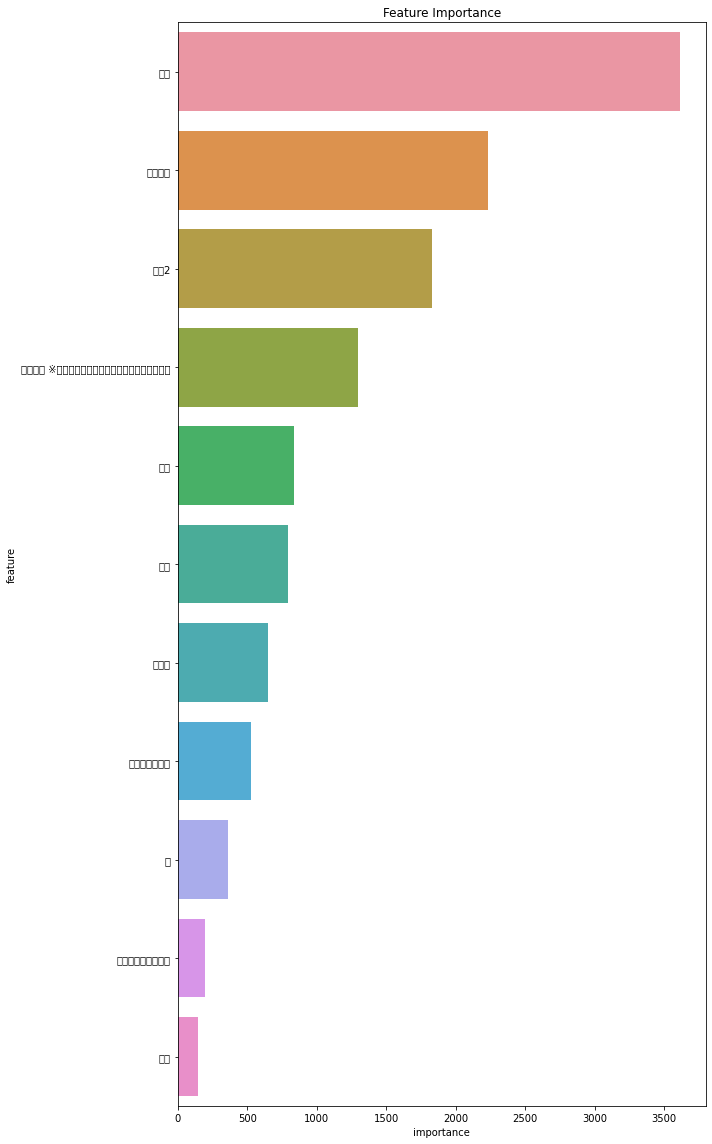

In [7]:
params = {
    'objective': "binary", # binary, multiclass, regression
    'metric': "binary_logloss", # mae, mse, auc, binary_logloss, multi_logloss, rmse, average_precision
    'learning_rate':0.05, #0.05
    'n_estimators': 10000,
    'max_depth': -1,
    'random_state' : 42531
    #'num_leaves' : 100, #カーディナリティが高い場合は大きくする
    #'max_bin' : 500,
}

result = run_experiment(params,
                        train[num_cols + cat_cols],
                        train[target_col],
                        test[num_cols + cat_cols],
                        cv=StratifiedKFold(5, shuffle=True, random_state=42531), #cv=5,
                        #groups=train.group
                        )

In [8]:
print(result.metrics) # Evalulation metrics for each fold

[0.759440418679549, 0.7839009661835747, 0.8051127214170692, 0.7867914653784219, 0.8461716437558341, 0.7947945307645299]


In [12]:
result.importance     # Feature importance for each fold

[                      feature   importance
 0                          緯度   517.108759
 1                          経度   745.997658
 2                          棟名   118.395631
 3                         種別2  1813.343744
 4                           国   310.308490
 5                          時代  3517.809666
 6   都道府県 ※美工品は「所有者住所（所在都道府県）」  1079.022531
 7                         所在地   414.912728
 8                     保管施設の名称   445.561797
 9                        所有者名  2025.875614
 10                  管理団体又は責任者   136.476571,
                       feature   importance
 0                          緯度   533.711432
 1                          経度   498.910121
 2                          棟名    92.391731
 3                         種別2  1539.957784
 4                           国   208.716029
 5                          時代  3353.124177
 6   都道府県 ※美工品は「所有者住所（所在都道府県）」   899.791631
 7                         所在地   594.391184
 8                     保管施設の名称   402.547037
 9                        所有者名 

In [10]:
print(result.test_prediction)  # Test prediction in numpy array
print(result.oof_prediction)   # Out-of-fold prediction in numpy array

[0.0133214  0.19062195 0.18247676 ... 0.21702876 0.02647503 0.01273724]
[0.02052351 0.28150617 0.30911372 ... 0.07568181 0.28072942 0.02484635]


In [15]:
train[target_col].to_numpy()

array([0, 0, 1, ..., 0, 0, 0])

In [16]:
# データ全体のF1スコアを計算 & 閾値の最適化
from sklearn.metrics import f1_score

def find_optimal_threshold(y_true, y_scores):
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0
    best_score = 0

    for threshold in thresholds:
        y_pred = (y_scores > threshold).astype(int)
        score = f1_score(y_true, y_pred)

        if score > best_score:
            best_score = score
            best_threshold = threshold

    return best_threshold, best_score

# 例として使用するデータ（実際にはモデルからの予測値と実際のラベルを使用）
y_true = train[target_col].values
y_scores = result.oof_prediction

best_threshold, best_f1_score = find_optimal_threshold(y_true, y_scores)
print(f"Best threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1_score}")

Best threshold: 0.17171717171717174
Best F1 Score: 0.30678466076696165


In [18]:
# 閾値を超える確率を持つ要素を1に、それ以外を0に変換
y_pred = (result.test_prediction > best_threshold).astype(int)
print(y_pred)
print(y_pred.shape)

[0 1 1 ... 1 0 0]
(10065,)


In [19]:
sample_submission['is_kokuhou'] = y_pred
sample_submission

,is_kokuhou
0,0
1,1
2,1
3,0
4,0
...,...
10060,0
10061,0
10062,1
10063,0


In [20]:
sample_submission["is_kokuhou"].value_counts()

0    8875
1    1190
Name: is_kokuhou, dtype: int64

In [21]:
sample_submission.to_csv('lightgbm_ver1.csv', index=False)

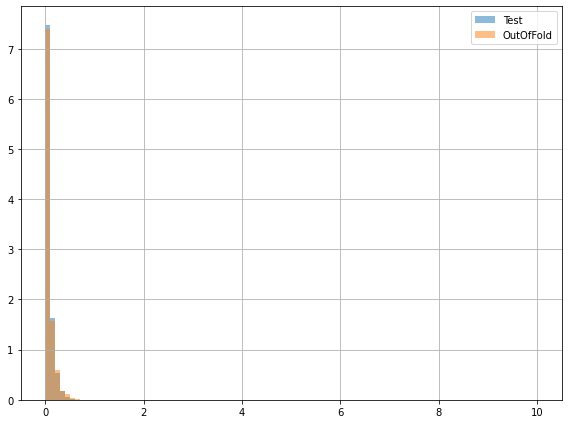

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

vmax = .02
bins = np.linspace(0, 10, 100)
ax.hist(result.test_prediction, bins=bins, density=True, alpha=.5, label="Test")
ax.hist(result.oof_prediction, bins=bins, density=True, alpha=.5, label="OutOfFold")
ax.grid()
ax.legend()
# ax.set_title("テストと学習時の予測傾向差分")

fig.tight_layout()